# Bonus: Temperature Analysis I

In [1]:
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# "tobs" is "temperature observations"
df = pd.read_csv('./Resources/hawaii_measurements.csv')
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [3]:
# Convert the date column format from string to datetime
df['date']= pd.to_datetime(df['date'])

In [4]:
# Set the date column as the DataFrame index
df = df.set_index('date')

In [5]:
# Drop the date column
# Is this needed? Can you drop the column used as index?

### Compare June and December data across all years 

In [6]:
from scipy import stats

In [7]:
# Filter data for desired months
june_records_df = df[df.index.month_name() == "June"]
dec_records_df = df[df.index.month_name() == "December"]
print(june_records_df)
print(dec_records_df)

                station  prcp  tobs
date                               
2010-06-01  USC00519397  0.00    78
2010-06-02  USC00519397  0.01    76
2010-06-03  USC00519397  0.00    78
2010-06-04  USC00519397  0.00    76
2010-06-05  USC00519397  0.00    77
...                 ...   ...   ...
2017-06-26  USC00516128  0.02    79
2017-06-27  USC00516128  0.10    74
2017-06-28  USC00516128  0.02    74
2017-06-29  USC00516128  0.04    76
2017-06-30  USC00516128  0.20    75

[1700 rows x 3 columns]
                station  prcp  tobs
date                               
2010-12-01  USC00519397  0.04    76
2010-12-03  USC00519397  0.00    74
2010-12-04  USC00519397  0.00    74
2010-12-06  USC00519397  0.00    64
2010-12-07  USC00519397  0.00    64
...                 ...   ...   ...
2016-12-27  USC00516128  0.14    71
2016-12-28  USC00516128  0.14    71
2016-12-29  USC00516128  1.03    69
2016-12-30  USC00516128  2.37    65
2016-12-31  USC00516128  0.90    65

[1517 rows x 3 columns]


In [8]:
# Identify the average temperature for June
june_average = june_records_df["tobs"].mean()
print(" June Average Temp = %.2f" % june_average)

june_records_df.describe()

 June Average Temp = 74.94


,prcp,tobs
count,1574.000000,1700.000000
mean,0.136360,74.944118
std,0.335731,3.257417
min,0.000000,64.000000
25%,0.000000,73.000000
50%,0.020000,75.000000
75%,0.120000,77.000000
max,4.430000,85.000000


In [9]:
# Identify the average temperature for December
dec_average = dec_records_df["tobs"].mean()
print("Dec Average Temp = %.2f" % dec_average)
dec_records_df.describe()

Dec Average Temp = 71.04


,prcp,tobs
count,1405.000000,1517.000000
mean,0.216819,71.041529
std,0.541399,3.745920
min,0.000000,56.000000
25%,0.000000,69.000000
50%,0.030000,71.000000
75%,0.150000,74.000000
max,6.420000,83.000000


In [16]:
# Create collections of temperature data
# Need to slice the june data frame to same size as december data since the paired t-test requires same length arrays.
june_records_df = june_records_df.iloc[:len(dec_records_df),:]

june_temps = june_records_df["tobs"]
dec_temps  = dec_records_df["tobs"]

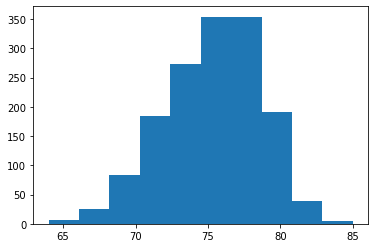

In [12]:
plt.hist(june_temps)
plt.show()

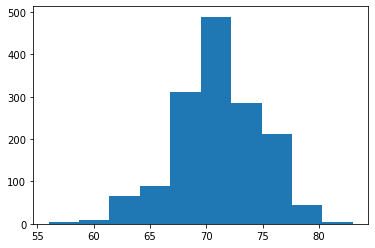

In [13]:
plt.hist(dec_temps)
plt.show()

In [14]:
# Run paired t-test
stats.ttest_rel(june_temps, dec_temps)

Ttest_relResult(statistic=34.804545051754815, pvalue=1.4623155269997529e-195)

### Analysis

Although mild weather can be generally defined as "not in the extreme", mild weather is relative to the location.
Mild weather in Alaska is different to mild weather in the Saharan desert. 

For this particular case (June and December weather in Hawaii), we will consider mild weather to be between 70 and 80 degrees farenheit. 
From the output of the ```describe()``` function, the temp. averages are 75.3 in June and 71 in December, providing solid 
evidence that indeed, the weather in Hawaii is mild. 

For the analysis we attempt to determine if the mean temperatures for the month of June and December in Hawaii are 
significantly different. We used a paired t-test since both set of measurements are being collected from the same population of stations,
during two different time periods.

The null hypothesis in the paired t-test assumes that the true mean difference between the paired temperature samples is zero.
The p-value obtained indicates the probability of obtaining these tests results if the null hypothesis was true.  Since the p-value was extremely small, we must reject the null hypothesis and conclude that the differences are statistcally significant.
